In [9]:
import os
import pandas as pd
from PIL import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib.utils import ImageReader
import io

In [10]:
csv_file = pd.read_csv('annotations.csv')
csv_file = pd.DataFrame(csv_file)
print(csv_file.head())

                        Filename 1 - Neck 2 - Gantry tilt 3 - Holes  \
0  6001-161_20131229_1702_ct.png       no              no        no   
1  6001-161_20131230_0847_ct.png       no              no        no   
2  6001-161_20131230_1525_ct.png       no              no        no   
3  6001-161_20131231_2150_ct.png       no              no       yes   
4  6001-161_20140101_1028_ct.png       no              no        no   

  4 - Nonbrain 5 - CTA 6 - Noisy Artifacts 7 - Craniotomy  
0           no      no                  no             no  
1           no      no                  no             no  
2           no      no                  no             no  
3           no      no                  no             no  
4           no      no                  no             no  


In [11]:
#subset
csv_file = csv_file[csv_file['1 - Neck'] == 'yes']
print(csv_file.head())

                          Filename 1 - Neck 2 - Gantry tilt 3 - Holes  \
72   6009-321_20140226_2300_ct.png      yes              no        no   
164  6018-323_20140404_1153_ct.png      yes              no        no   
281  6029-173_20140429_1335_ct.png      yes              no        no   
317  6033-301_20140515_0008_ct.png      yes              no        no   
384  6040-243_20140609_0945_ct.png      yes              no        no   

    4 - Nonbrain 5 - CTA 6 - Noisy Artifacts 7 - Craniotomy  
72           yes      no                  no             no  
164           no      no                  no             no  
281           no      no                  no             no  
317           no      no                  no             no  
384           no      no                  no             no  


In [23]:
import os
import pandas as pd
from PIL import Image, UnidentifiedImageError
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Load CSV and filter
csv_file = pd.read_csv('annotations.csv')
filtered = csv_file[csv_file['7 - Craniotomy'] == 'yes']

# Define image directories
folder1 = '/Users/rushil/ichseg/image_ss_original'
folder2 = '/Users/rushil/Downloads/image_ss'

bad_files = []
output_pdf = "craniotomy_image_comparison.pdf"

# Create the PDF
with PdfPages(output_pdf) as pdf:
    for idx, row in filtered.iterrows():
        filename = row['Filename']
        path1 = os.path.join(folder1, filename)
        path2 = os.path.join(folder2, filename)

        # Skip missing files
        if not (os.path.exists(path1) and os.path.exists(path2)):
            print(f"🚫 Missing file: {filename}")
            bad_files.append(filename)
            continue

        # Try to open images safely
        try:
            img1 = Image.open(path1)
            img2 = Image.open(path2)
        except UnidentifiedImageError:
            print(f"❌ Unreadable image file: {filename}")
            bad_files.append(filename)
            continue

        # Plot side-by-side
        fig, axs = plt.subplots(1, 2, figsize=(10, 8))
        axs[0].imshow(img1, cmap='gray')
        axs[0].set_title(f"Left: {os.path.basename(folder1)}", fontsize=10)
        axs[0].axis('off')

        axs[1].imshow(img2, cmap='gray')
        axs[1].set_title(f"Right: {os.path.basename(folder2)}", fontsize=10)
        axs[1].axis('off')

        fig.suptitle(f"Filename: {filename}", fontsize=14, y=0.95)
        plt.tight_layout(rect=[0, 0, 1, 0.93])
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)

# Report problematic files
if bad_files:
    print("\n⚠️ The following files could not be processed:")
    for file in bad_files:
        print(f" - {file}")

print(f"\n✅ PDF created: {output_pdf}")



✅ PDF created: craniotomy_image_comparison.pdf


In [24]:
csv_file = pd.read_csv('annotations.csv')
csv_file = pd.DataFrame(csv_file)
print(csv_file.head())

                        Filename 1 - Neck 2 - Gantry tilt 3 - Holes  \
0  6001-161_20131229_1702_ct.png       no              no        no   
1  6001-161_20131230_0847_ct.png       no              no        no   
2  6001-161_20131230_1525_ct.png       no              no        no   
3  6001-161_20131231_2150_ct.png       no              no       yes   
4  6001-161_20140101_1028_ct.png       no              no        no   

  4 - Nonbrain 5 - CTA 6 - Noisy Artifacts 7 - Craniotomy  
0           no      no                  no             no  
1           no      no                  no             no  
2           no      no                  no             no  
3           no      no                  no             no  
4           no      no                  no             no  


In [27]:
# 1. Paste in the list of all 67 file-names (no leading “1.”, “2.”, etc.)
file_list = [
    '6018-323_20140408_0452_ct.png',
    '6037-134_20140530_1507_ct.png',
    '6058-208_20140921_0415_ct.png',
    '6068-157_20141114_1926_ct.png',
    '6068-157_20150331_1246_ct.png',
    '6070-240_20150427_2253_ct.png',
    '6083-290_20150601_1158_ct.png',
    '6088-134_20141208_0933_ct.png',
    '6105-100_20150118_0518_ct.png',
    '6105-100_20150123_1728_ct.png',
    '6139-131_20150428_1716_ct.png',
    '6167-179_20150710_1007_ct.png',
    '6174-220_20150726_1042_ct.png',
    '6175-297_20160108_1110_ct.png',
    '6193-324_20150903_1516_ct.png',
    '6214-314_20160212_0652_ct.png',
    '6229-303_20151110_1819_ct.png',
    '6235-237_20151120_2157_ct.png',
    '6254-323_20151214_1309_ct.png',
    '6265-134_20160109_0554_ct.png',
    '6265-134_20160112_0522_ct.png',
    '6265-134_20160115_0529_ct.png',
    '6265-134_20160209_1806_ct.png',
    '6269-193_20160118_1745_ct.png',
    '6276-216_20160203_1458_ct.png',
    '6279-266_20160202_1641_ct.png',
    '6305-188_20160401_2325_ct.png',
    '6315-296_20160418_1251_ct.png',
    '6315-296_20160419_1147_ct.png',
    '6318-301_20160425_0849_ct.png',
    '6318-301_20160426_1644_ct.png',
    '6318-301_20160427_1755_ct.png',
    '6319-287_20160422_1642_ct.png',
    '6319-287_20160423_1142_ct.png',
    '6319-287_20160423_2248_ct.png',
    '6319-287_20160424_1017_ct.png',
    '6319-287_20160425_1030_ct.png',
    '6319-287_20160426_1444_ct.png',
    '6319-287_20160427_1243_ct.png',
    '6319-287_20160428_1102_ct.png',
    '6319-287_20160523_1204_ct.png',
    '6321-205_20160428_2102_ct.png',
    '6323-320_20160501_0103_ct.png',
    '6347-133_20160726_1935_ct.png',
    '6349-204_20160709_1450_ct.png',
    '6350-319_20160714_0028_ct.png',
    '6358-343_20160811_1125_ct.png',
    '6363-179_20160824_0405_ct.png',
    '6364-241_20160828_1226_ct.png',
    '6377-362_20160930_0455_ct.png',
    '6378-349_20170414_1055_ct.png',
    '6380-320_20161004_0457_ct.png',
    '6387-160_20161014_0858_ct.png',
    '6392-100_20161019_0447_ct.png',
    '6411-179_20170612_0917_ct.png',
    '6420-225_20161215_1008_ct.png',
    '6424-240_20161225_1040_ct.png',
    '6426-363_20161222_1450_ct.png',
    '6429-313_20170104_1847_ct.png',
    '6432-240_20170110_0805_ct.png',
    '6450-218_20170216_0508_ct.png',
    '6473-205_20170518_1403_ct.png',
    '6478-157_20170607_1215_ct.png',
    '6485-266_20170703_1539_ct.png',
    '6486-327_20170629_0439_ct.png',
    '6487-324_20170804_1402_ct.png',
    '6488-331_20170720_1224_ct.png',
]

# 2. Overwrite your “holes” column so only rows whose filename is in that list get 'yes'
csv_file['3 - Holes'] = csv_file['Filename'].isin(file_list).map({True: 'yes', False: 'no'})

print(csv_file.head())

# 3. Save the modified CSV
csv_file.to_csv('annotations_up.csv', index=False)

                        Filename 1 - Neck 2 - Gantry tilt 3 - Holes  \
0  6001-161_20131229_1702_ct.png       no              no        no   
1  6001-161_20131230_0847_ct.png       no              no        no   
2  6001-161_20131230_1525_ct.png       no              no        no   
3  6001-161_20131231_2150_ct.png       no              no        no   
4  6001-161_20140101_1028_ct.png       no              no        no   

  4 - Nonbrain 5 - CTA 6 - Noisy Artifacts 7 - Craniotomy  
0           no      no                  no             no  
1           no      no                  no             no  
2           no      no                  no             no  
3           no      no                  no             no  
4           no      no                  no             no  


In [44]:
# list your columns of interest
cols = [
    '1 - Neck',
    '3 - Holes',
    '4 - Nonbrain',
    '6 - Noisy Artifacts',
]

# make a boolean mask: True if any of those cols == 'yes'
mask = csv_file[cols].eq('yes').any(axis=1)

# count how many rows
count = mask.sum()
print(f"Rows with at least one “yes”: {count}")

Rows with at least one “yes”: 266


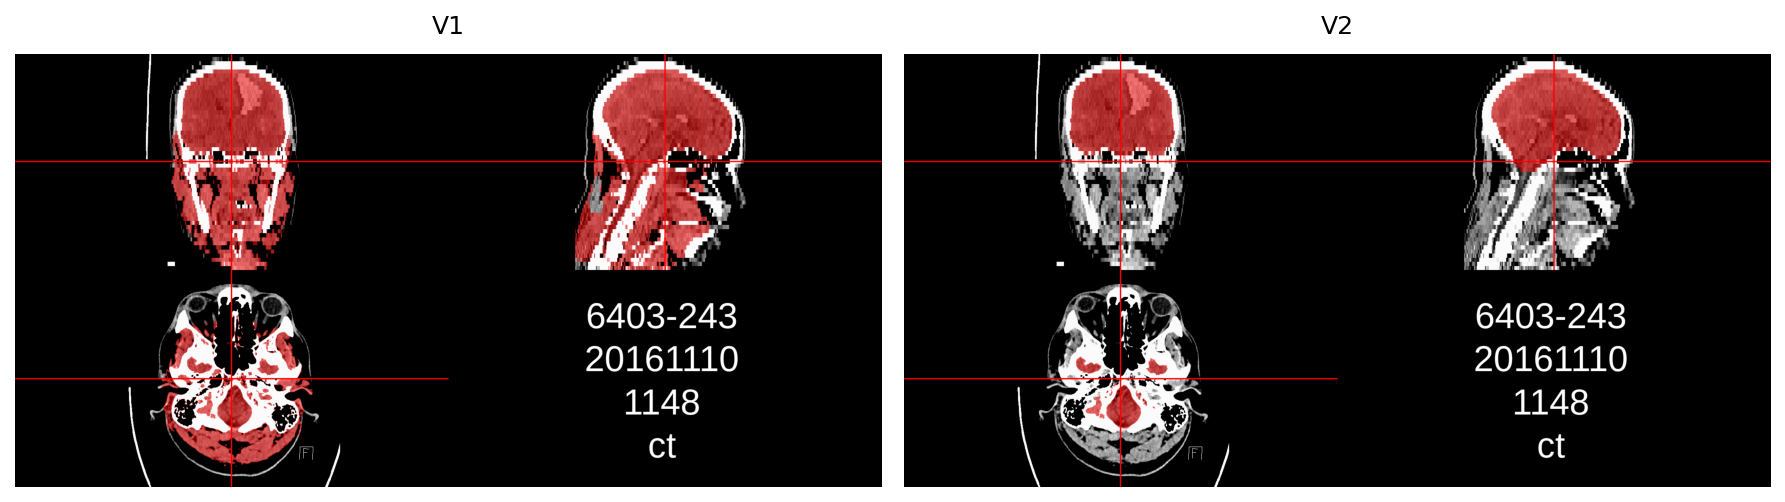

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Load your two PNGs
img1 = mpimg.imread('/Users/rushil/ichseg/image_ss_original/6403-243_20161110_1148_ct.png')
img2 = mpimg.imread('/Users/rushil/Downloads/image_ss/6403-243_20161110_1148_ct.png')

# 2. Create a side‐by‐side figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

# 3. Show each with no axes and a title
for ax, img, title in zip(axes, [img1, img2], 
                          ['V1', 'V2']):
    ax.imshow(img, cmap='gray')
    ax.set_title(title, pad=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig('skullstrip_comparison.png', bbox_inches='tight')
plt.show()


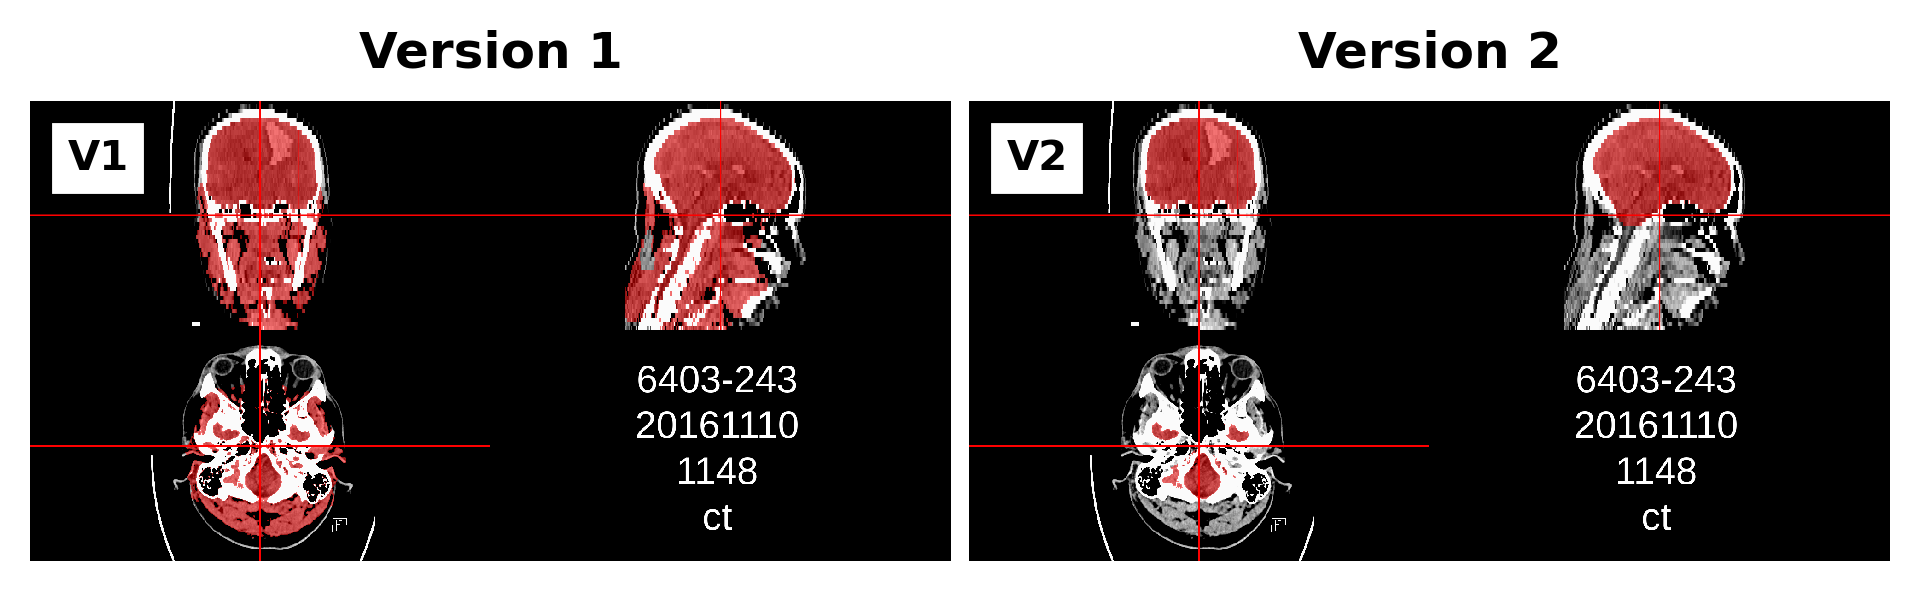

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnchoredText

# 1. (Optional) pick a clean style
plt.style.use('classic')

# 2. Load your two images
img1 = mpimg.imread('/Users/rushil/ichseg/image_ss_original/6403-243_20161110_1148_ct.png')
img2 = mpimg.imread('/Users/rushil/Downloads/image_ss/6403-243_20161110_1148_ct.png')

# 3. Create a high‐res figure with white background
fig, axes = plt.subplots(1, 2,
                         figsize=(8, 4),      # width, height in inches
                         dpi=300,             # high DPI for crisp export
                         facecolor='white')   # ensure white background

# 4. Loop through each axis, plot image, remove axes, and add panel letters
for ax, img, title, label in zip(
    axes,
    (img1, img2),
    ('Version 1', 'Version 2'),
    ('V1', 'V2')
):
    ax.imshow(img, interpolation='nearest')
    ax.set_title(title, pad=8, fontsize=12, fontweight='bold')
    ax.axis('off')

    # Add a little “A”/“B” in the corner
    at = AnchoredText(label,
                      loc='upper left',
                      prop=dict(size=10, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.02")
    ax.add_artist(at)

# 5. Tweak spacing so panels sit snugly
plt.subplots_adjust(wspace=0.02, hspace=0)


plt.show()


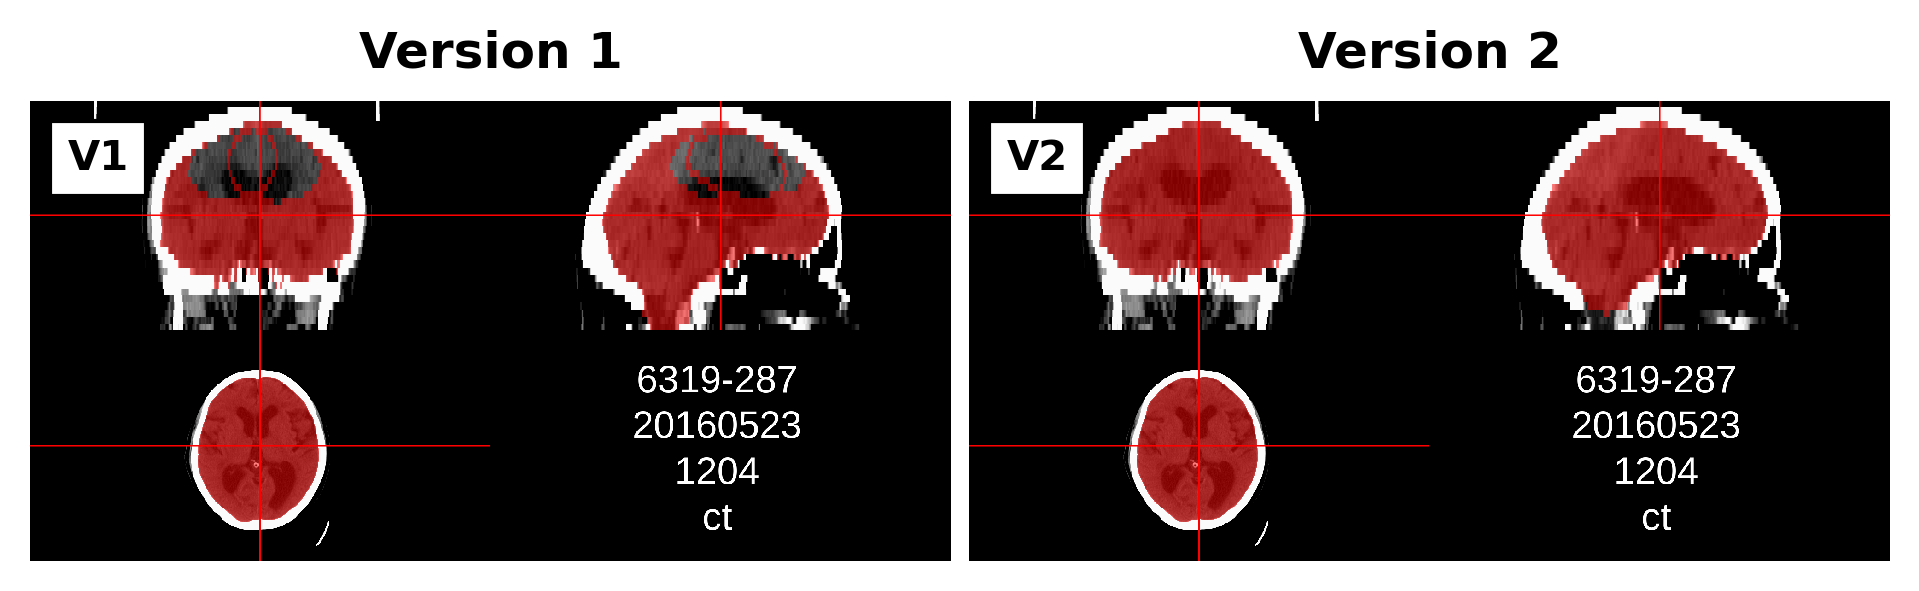

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnchoredText

# 1. (Optional) pick a clean style
plt.style.use('classic')

# 2. Load your two images
img1 = mpimg.imread('/Users/rushil/ichseg/image_ss_original/6319-287_20160523_1204_ct.png')
img2 = mpimg.imread('/Users/rushil/Downloads/image_ss/6319-287_20160523_1204_ct.png')

# 3. Create a high‐res figure with white background
fig, axes = plt.subplots(1, 2,
                         figsize=(8, 4),      # width, height in inches
                         dpi=300,             # high DPI for crisp export
                         facecolor='white')   # ensure white background

# 4. Loop through each axis, plot image, remove axes, and add panel letters
for ax, img, title, label in zip(
    axes,
    (img1, img2),
    ('Version 1', 'Version 2'),
    ('V1', 'V2')
):
    ax.imshow(img, interpolation='nearest')
    ax.set_title(title, pad=8, fontsize=12, fontweight='bold')
    ax.axis('off')

    # Add a little “A”/“B” in the corner
    at = AnchoredText(label,
                      loc='upper left',
                      prop=dict(size=10, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.02")
    ax.add_artist(at)

# 5. Tweak spacing so panels sit snugly
plt.subplots_adjust(wspace=0.02, hspace=0)


plt.show()


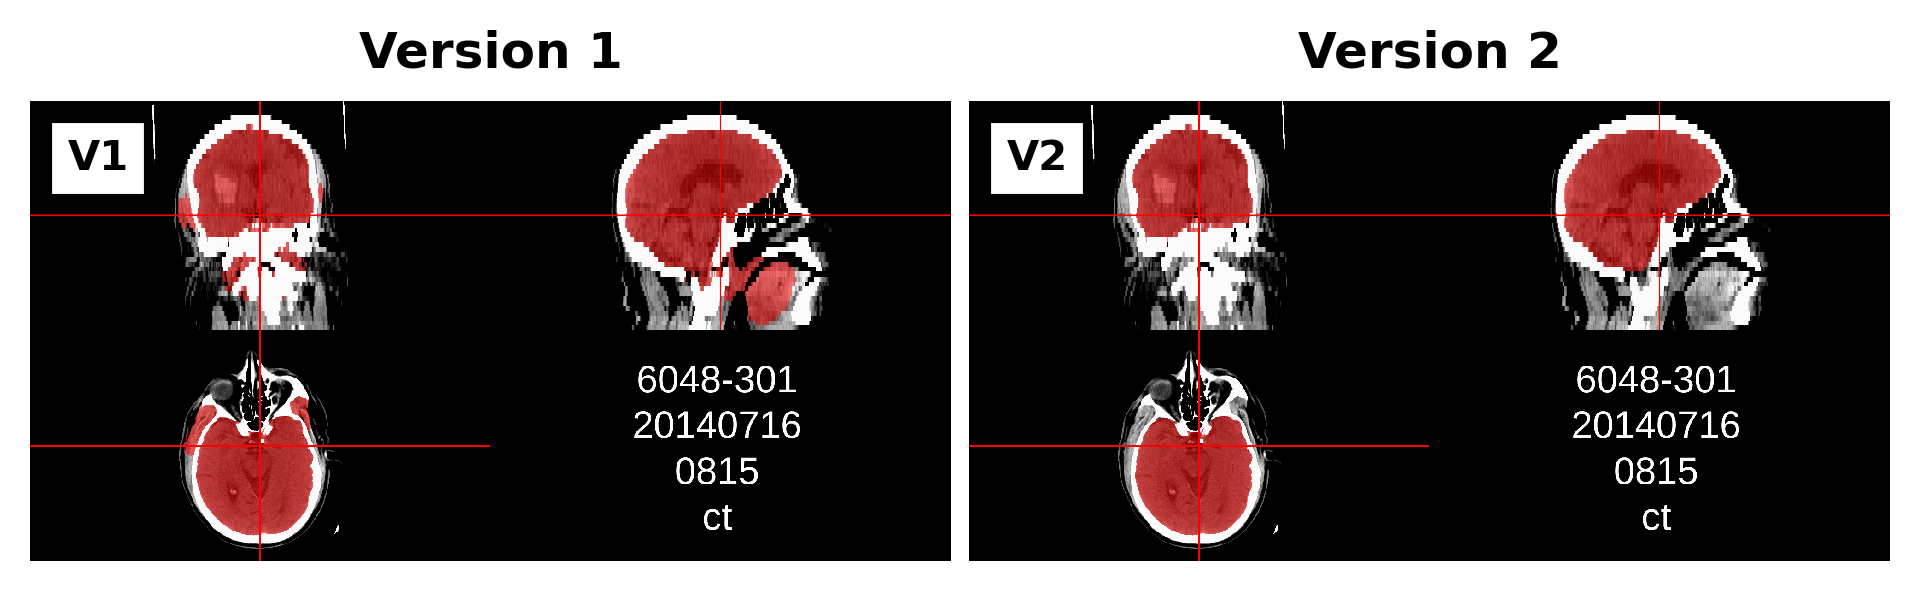

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnchoredText

# 1. (Optional) pick a clean style
plt.style.use('classic')

# 2. Load your two images
img1 = mpimg.imread('/Users/rushil/ichseg/image_ss_original/6048-301_20140716_0815_ct.png')
img2 = mpimg.imread('/Users/rushil/Downloads/image_ss/6048-301_20140716_0815_ct.png')

# 3. Create a high‐res figure with white background
fig, axes = plt.subplots(1, 2,
                         figsize=(8, 4),      # width, height in inches
                         dpi=300,             # high DPI for crisp export
                         facecolor='white')   # ensure white background

# 4. Loop through each axis, plot image, remove axes, and add panel letters
for ax, img, title, label in zip(
    axes,
    (img1, img2),
    ('Version 1', 'Version 2'),
    ('V1', 'V2')
):
    ax.imshow(img, interpolation='nearest')
    ax.set_title(title, pad=8, fontsize=12, fontweight='bold')
    ax.axis('off')

    # Add a little “A”/“B” in the corner
    at = AnchoredText(label,
                      loc='upper left',
                      prop=dict(size=10, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.02")
    ax.add_artist(at)

# 5. Tweak spacing so panels sit snugly
plt.subplots_adjust(wspace=0.02, hspace=0)


plt.show()


In [45]:
import pandas as pd

# Create the table data
data = {
    "Region": [
        "Frontal_R", "DeepWhiteMatter_R", "Lenticular_R", "InternalCapsule_R",
        "Caudate_R", "Thalamus_R", "Temporal_R", "Parietal_R",
        "DeepWhiteMatter_L", "Temporal_L"
    ],
    "FALSE": [159764, 51149, 4270, 3995, 3100, 6535, 73385, 86747, 5832, 79113],
    "NA": [24518, 181, 0, 0, 0, 1, 45395, 10190, 147, 37319],
    "TRUE": [3835, 3119, 2452, 2015, 989, 145, 57, 48, 3, 1],
    "pct_true": [2.04, 5.73, 36.5, 33.5, 24.2, 2.17, 0.0480, 0.0495, 0.00513, 0.000859]
}

In [46]:
df = pd.DataFrame(data)
df.to_csv("ich_summary.csv", index=False)
